# Crime Analysis in Canada

**Course:** CS2545 - Data Science

**Authors:**

- Ben Macgillivray - 3735161

- Cameron Smith - 3739079

- Ethan Alward - 3695438

---

## Introduction

The impact that crime has on the quality of life of a community is significant, as it generates fear and distrust, encourages social isolation, reduces economic activity, and negatively affects the development of children. Understanding the factors that contribute to crime is an essential step for developing effective prevention strategies.

This project explores crime rates across various regions in Canada at both the provincial and city levels. It examines socioeconomic factors such as income, education, and unemployment to determine if they are directly associated with differences in crime levels. This analysis is intended to provide insight into the complexity of crime patterns and determine if simple socioeconomic indicators are sufficient to explain the variations in crime rates across the country.

---

## Problem Overview

### Problem Statement

In Canada, crime remains a significant concern, with rates varying considerably across different regions. The factors contributing to these differences continue to be the subject of debate. Although crime statistics are widely available, a focused analysis that explores how socioeconomic factors such as income, education, and unemployment relate to regional variations in crime can offer valuable insight into underlying crime trends. By examining these potential relationships, we aim to better understand the factors influencing crime and contribute to the development of more informed and effective prevention strategies.

### Project Requirements

This project aims to analyze regional crime rates across Canada and explore their potential correlation with socioeconomic factors. To achieve this, the following requirements have been identified:

1. Collect crime statistics across various regions in Canada, at both the provincial and city levels.
2. Gather socioeconomic data for these regions, focusing on factors such as income, education, and unemployment.
3. Analyze the relationships between crime rates and socioeconomic factors.
4. Present findings, using visualizations and key summaries.

These objectives are intended to provide insight into crime trends in Canada and evaluate the influence of basic socioeconomic factors on these patterns.

---

## Approach

The first step in our analysis was to examine crime rates and socioeconomic factors at a provincial level. We used data from the *Police Reported Crime Statistics in Canada (2022)* dataset and the *Canadian Income Survey (2022)*, both available from Statistics Canada, to gather information on crime rates, average after-tax income, and education levels. This provided an overview of provincial trends, but did not reveal any significant insights into the correlation between crime and socioeconomic factors. Based on the results, we decided to evaluate a third socioeconomic factor, unemployment rate, to determine whether it showed a stronger relationship with crime rates. This variable also failed to show a strong correlation with crime rates, suggesting that provincial-level analysis may not be sufficient to explain variations in crime.

After finding limited results at the provincial level, we narrowed our analysis to focus on specific cities within a single province. We chose to examine cities in New Brunswick, as we attend university in the province and the region offers varying population sizes. This provided an opportunity to investigate whether a more detailed, city-specific approach would reveal stronger relationships between crime rates and socioeconomic factors. However, similar to the provincial-level analysis, the city-based approach did not reveal any strong correlations between crime rates and basic socioeconomic indicators.

---

## Analysis

All data analysis was conducted using the `pandas` library in Python. This library was well-suited for our purposes, as it provides tools for manipulating, organizing, and analyzing structured data. We also utilized the `matplotlib` library to create visualizations that helped identify patterns in our findings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Provincial Level Analysis

In this section, we analyze crime rates and socioeconomic factors across Canadian provinces to determine if there is a correlation between these variables at a high level. We use information provided by Statistics Canada to examine patterns in reported crime rates, income, education, and unemployment levels.

#### Police Reported Crime Statistics Analysis

We began by collecting and cleaning data from the *Police Reported Crime Statistics in Canada (2022)* dataset, which includes information on total crimes, crime rates, and crime severity for each province.

In [2]:
# Police Reported Crime Statistics in Canada (2022)
# **************************************************

# Dataset
crime2022_df = pd.read_csv('../data/police-reported-crime-data-2022.csv', skiprows=[0])

# Clean DF
crime2022_df.columns = crime2022_df.columns.str.strip()
crime2022_df = crime2022_df[ crime2022_df['Location'] != 'Canada' ]
crime2022_df = crime2022_df.rename(columns={ 'Location': 'Province' })
crime2022_df = crime2022_df.rename(columns={ 'Total Crime Severity Index': 'Severity Index' })
crime2022_df = crime2022_df.rename(columns={ 'Total Crime Rate': 'Crime Rate' })

# Crime Data
crime2022_df = crime2022_df[['Province', 'Severity Index','Total Crimes', 'Crime Rate']]


#### Canadian Income Survey Analysis

Next, we collected data from the *Canadian Income Survey (2022)*. This dataset includes information on average after-tax income and education levels throughout each province. We primarily focused on the percentage of individuals who had completed their post-secondary education. 


In [3]:
# Canadian Income Survey (2022)
# **************************************************

# Dataset
cis_df = pd.read_csv('../data/canadian-income-survey-2022.csv')

# Province Codes
province_codes = { 10: 'Newfoundland and Labrador', 11: 'Prince Edward Island', 12: 'Nova Scotia', 13: 'New Brunswick', 24: 'Quebec', 35: 'Ontario', 46: 'Manitoba',47: 'Saskatchewan', 48: 'Alberta', 59: 'British Columbia' }

# Clean DF
cis_df['ATINC'] = cis_df['ATINC'].replace(999999999996, pd.NA)
cis_df['HLEV2G'] = cis_df['HLEV2G'].replace([6, 9], pd.NA)

# Income Data
avg_province_income = cis_df.groupby('PROV')['ATINC'].mean().reset_index()
avg_province_income['Province'] = avg_province_income['PROV'].map(province_codes)
avg_province_income = avg_province_income[['Province', 'ATINC']]
avg_province_income['Average Income'] = avg_province_income['ATINC'].apply(lambda x: f"{x:,.2f}")
avg_province_income = avg_province_income[['Province', 'Average Income']]

# Education Data
university_education_df = cis_df[ cis_df['HLEV2G'] == 4 ]
province_education_count = university_education_df.groupby('PROV').size()
province_population_count = cis_df.groupby('PROV').size()

province_education_rate = (province_education_count / province_population_count).reset_index(name='Education Rate')
province_education_rate['Province'] = province_education_rate['PROV'].map(province_codes)
province_education_rate['Education Rate (%)'] = (province_education_rate['Education Rate'] * 100).round(2)
province_education_rate = province_education_rate[['Province', 'Education Rate (%)']]

# Data Summary
cis_data = pd.merge(avg_province_income, province_education_rate, on='Province')


#### Provincial Crime Rate Correlation with Income and Education

To examine the relationship between crime and socioeconomic factors at the provincial level, we combined the data obtained from the *Police Reported Crime Statistics in Canada (2022)* dataset with the data from the *Canadian Income Survey (2022)*. The resulting dataset included information about each province's crime rate, average income after taxes, and the percentage of individuals who have completed a post-secondary education.

In [4]:
# Provincial Crime, Income, and Education Analysis
# **************************************************

# Provincial Data
provincial_data = pd.merge(crime2022_df, cis_data, on='Province')
provincial_data['Average Income'] = provincial_data['Average Income'].replace(',', '', regex=True).astype(float)
provincial_data = provincial_data.sort_values(by='Crime Rate', ascending=True)


We then created scatter plots to visualize the relationships between crime rates and these socioeconomic indicators.

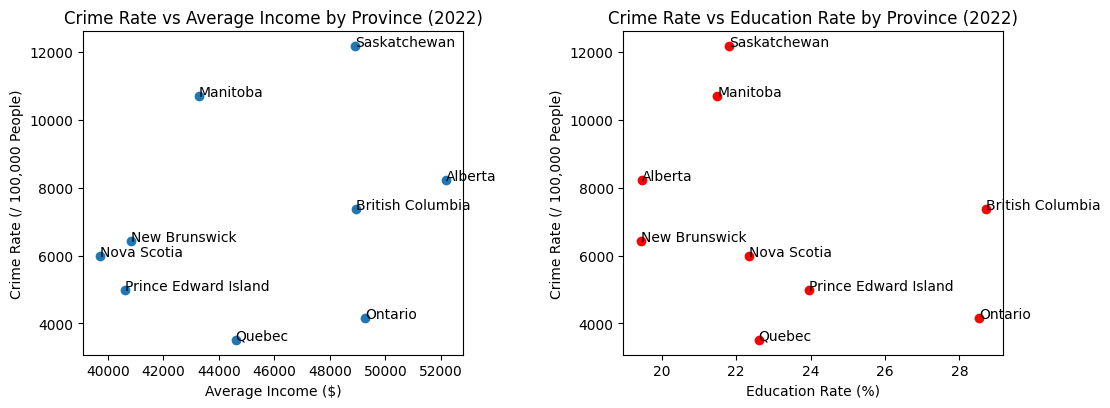

In [5]:
# Provincial Data Visualization
# **************************************************

# Plot Data
plt.figure(figsize=(12,5))

# Income
plt.subplot(1, 2, 1)
plt.scatter(provincial_data['Average Income'], provincial_data['Crime Rate'])

for i, row in provincial_data.iterrows():
    plt.text(row['Average Income'], row['Crime Rate'], row['Province'])

plt.title('Crime Rate vs Average Income by Province (2022)')
plt.xlabel('Average Income ($)')
plt.ylabel('Crime Rate (/ 100,000 People)')

# Education
plt.subplot(1, 2, 2)
plt.scatter(provincial_data['Education Rate (%)'], provincial_data['Crime Rate'], color='red')

for i, row in provincial_data.iterrows():
    plt.text(row['Education Rate (%)'], row['Crime Rate'], row['Province'])

plt.title('Crime Rate vs Education Rate by Province (2022)')
plt.xlabel('Education Rate (%)')
plt.ylabel('Crime Rate (/ 100,000 People)')

# Display
plt.tight_layout(pad=4.0)
plt.show()


The resulting scatter plots suggest that there is no strong correlation between provincial crime rates and either income or education levels. For instance, Saskatchewan has the highest crime rate among provinces, but also one of the highest average incomes. Similarly, New Brunswick has a relatively low education rate but does not exhibit an unusually high crime rate.


#### Provincial Unemployment Rate Analysis

Since the initial comparisons between crime rate, income, and education level revealed no clear correlation, we also decided to examine the unemployment rate across Canadian provinces. This is another key socioeconomic factor that may contribute to higher crime rates.

In [6]:
# Canadian Unemployment Rate
# **************************************************

# Unemployment Data
unemployment_df = pd.read_csv('../data/unemployment-rate.csv')
unemployment_df = unemployment_df.rename(columns={
    'Labour force characteristics': 'Province',
    'Unemployment rate': 'Unemployment Rate'
})
unemployment_df['Province'] = unemployment_df['Province'].str.strip()


#### Provincial Crime Rate Correlation with Unemployment

After collecting unemployment data, we integrated it with the existing provincial crime dataset and used the same approach as we did for our income and education analysis to examine potential correlations.

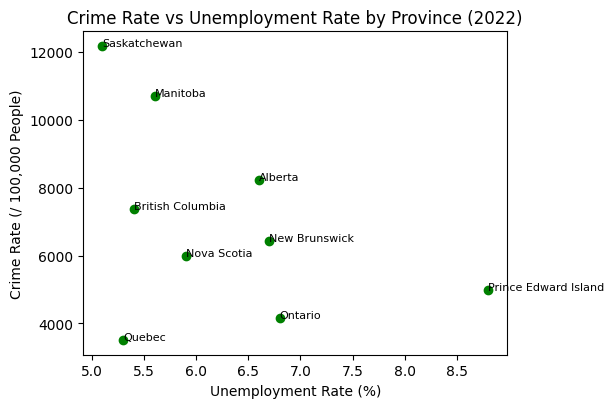

In [7]:
# Provincial Crime and Unemployment Analysis
# **************************************************

# Crime Data
crime_df = pd.read_csv('../data/police-reported-crime-data-2022.csv', skiprows=[0])
crime_df.columns = crime_df.columns.str.strip()
crime_df = crime_df[crime_df['Location'] != 'Canada']
crime_df = crime_df.rename(columns={
    'Location': 'Province',
    'Total Crime Severity Index': 'Crime Severity',
    'Total Crime Rate': 'Crime Rate'
})
crime_df = crime_df[['Province', 'Crime Severity', 'Total Crimes', 'Crime Rate']]

# Total Data
employment_crime_df = pd.merge(crime_df, unemployment_df, on='Province')

# Data Visualization
plt.figure(figsize=(7, 5))

plt.scatter(employment_crime_df['Unemployment Rate'], employment_crime_df['Crime Rate'], color='green')

for i, row in employment_crime_df.iterrows():
    plt.text(row['Unemployment Rate'], row['Crime Rate'], row['Province'], fontsize=8)

plt.title('Crime Rate vs Unemployment Rate by Province (2022)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Rate (/ 100,000 People)')

plt.tight_layout(pad=4.0)
plt.show()


Similar to the scatter plots for crime rate versus income and education, this visualization also suggests no strong correlation between provincial crime rates and unemployment rates. For example, Quebec and British Columbia have similar unemployment rates, yet British Columbia reports nearly twice the number of crimes per capita.


#### Provincial Analysis Summary

These findings indicate that a provincial-level analysis may not sufficiently explain variations in crime rates across regions. A more specific approach, such as analyzing these statistics at a city level, may provide clearer insights into the relationship between crime and socioeconomic factors.


### City Level Analysis

This section contains an analysis of crime rates and socioeconomic factors across Canadian cities. By narrowing the focus to a more specific level, the goal was to assess whether this approach would reveal stronger relationships between crime rates and socioeconomic factors such as income and education levels, which were not evident at a provincial level.


#### Analysis of New Brunswick Cities

To conduct our analysis at the city level, we selected cities within New Brunswick that vary in population. These included Bathurst, Edmundston, Fredericton, Miramichi, Moncton, and Saint John. The objective was to determine whether crime rates in these cities were more closely associated with basic socioeconomic indicators than at the provincial level. We began by collecting crime, income, and education data for each city, all of which were obtained from Statistics Canada. Again, for education, we focused on the percentage of individuals who completed a post-secondary education.


In [8]:
# New Brunswick City Analysis
# **************************************************

nb_cities = ['Bathurst', 'Edmundston', 'Fredericton', 'Miramichi', 'Moncton', 'Saint John']

# Crime Dataset
crime_nb = pd.read_csv('../data/newbrunswick/crime-data-nb.csv', skiprows=[0])
crime_nb = crime_nb[ crime_nb['Geography'] != 'New Brunswick' ]


# Income
income_nb = pd.DataFrame({ 'City': nb_cities })
income_nb['Median Income (After Tax)'] = pd.NA
income_nb = income_nb.set_index('City')

# Income Data - Bathurst
income_bathurst = pd.read_csv('../data/newbrunswick/income-data-nb-bathurst.csv', skiprows=[0])
income_nb.loc['Bathurst', 'Median Income (After Tax)'] = income_bathurst.iloc[0, 5]

# Income Data - Edmundston
income_edmundston = pd.read_csv('../data/newbrunswick/income-data-nb-edmundston.csv', skiprows=[0])
income_nb.loc['Edmundston', 'Median Income (After Tax)'] = income_edmundston.iloc[0, 5]

# Income Data - Fredericton
income_fredericton = pd.read_csv('../data/newbrunswick/income-data-nb-fred.csv', skiprows=[0])
income_nb.loc['Fredericton', 'Median Income (After Tax)'] = income_fredericton.iloc[0, 5]

# Income Data - Miramichi
income_miramichi = pd.read_csv('../data/newbrunswick/income-data-nb-miramichi.csv', skiprows=[0])
income_nb.loc['Miramichi', 'Median Income (After Tax)'] = income_miramichi.iloc[0, 5]

# Income Data - Moncton
income_moncton = pd.read_csv('../data/newbrunswick/income-data-nb-mon.csv', skiprows=[0])
income_nb.loc['Moncton', 'Median Income (After Tax)'] = income_moncton.iloc[0, 5]

# Income Data - Saint John
income_sj = pd.read_csv('../data/newbrunswick/income-data-nb-sj.csv', skiprows=[0])
income_nb.loc['Saint John', 'Median Income (After Tax)'] = income_sj.iloc[0, 5]

income_nb = income_nb.reset_index()


# Education
education_nb = pd.DataFrame({ 'City': nb_cities })
education_nb['Education Rate'] = pd.NA
education_nb = education_nb.set_index('City')

education_data_nb = pd.read_csv('../data/newbrunswick/education-data-nb.csv', skiprows=[0])
education_data_nb = education_data_nb[ education_data_nb['Geography'].str.contains('Bathurst|Edmundston|Fredericton|Miramichi|Moncton|Saint John') ]
education_data_nb = education_data_nb.rename(columns={'No certificate, diploma or degree': 'No Certificate'})
education_data_nb = education_data_nb.rename(columns={'High (secondary) school diploma or equivalency certificate 6': 'High School Diploma'})
education_data_nb['Uneducated Rate'] = education_data_nb[['No Certificate', 'High School Diploma']].sum(axis=1)
education_data_nb = education_data_nb.set_index('Geography')

education_nb.loc['Bathurst', 'Education Rate'] = (100 - education_data_nb.loc['Bathurst (CA), N.B. i17', 'Uneducated Rate'])
education_nb.loc['Edmundston', 'Education Rate'] = (100 - education_data_nb.loc['Edmundston (CA), N.B. i21', 'Uneducated Rate'])
education_nb.loc['Fredericton', 'Education Rate'] = (100 - education_data_nb.loc['Fredericton (CMA), N.B. i22', 'Uneducated Rate'])
education_nb.loc['Miramichi', 'Education Rate'] = (100 - education_data_nb.loc['Miramichi (CA), N.B. i23', 'Uneducated Rate'])
education_nb.loc['Moncton', 'Education Rate'] = (100 - education_data_nb.loc['Moncton (CMA), N.B. i24', 'Uneducated Rate'])
education_nb.loc['Saint John', 'Education Rate'] = (100 - education_data_nb.loc['Saint John (CMA), N.B. i25', 'Uneducated Rate'])
education_nb = education_nb.reset_index()


# Total Statistics
nb_data = pd.merge(crime_nb, income_nb, left_on='Geography', right_on='City')
nb_data = pd.merge(nb_data, education_nb, on='City')
nb_data['Rate per 100,000'] = nb_data['Rate per 100,000'].replace(',', '', regex=True).astype(float)
nb_data['Median Income (After Tax)'] = nb_data['Median Income (After Tax)'].replace(',', '', regex=True).astype(float)


We then created additional scatter plots to visualize the relationships between crime rates and the selected socioeconomic indicators at the city level.

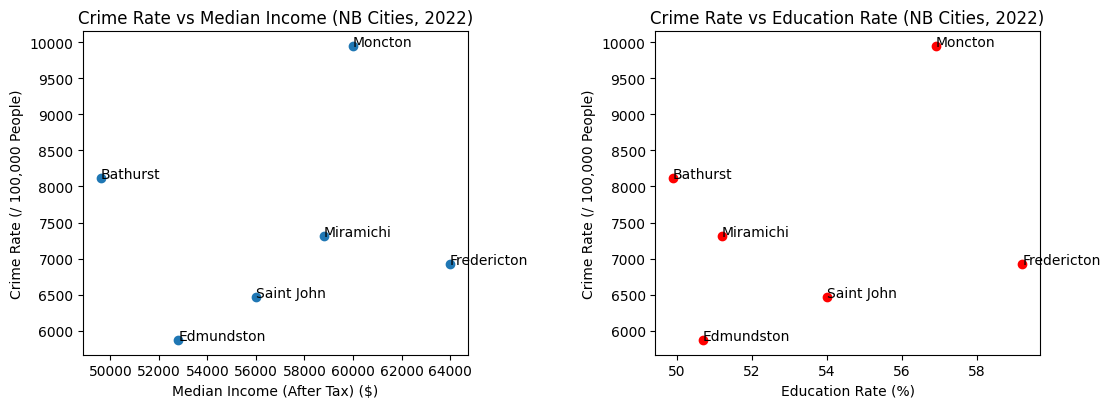

In [9]:
# New Brunswick Data Visualization
# **************************************************

# Plot Data
plt.figure(figsize=(12, 5))

# Income
plt.subplot(1, 2, 1)
plt.scatter(nb_data['Median Income (After Tax)'], nb_data['Rate per 100,000'])

for i, row in nb_data.iterrows():
    plt.text(row['Median Income (After Tax)'], row['Rate per 100,000'], row['City'])

plt.title('Crime Rate vs Median Income (NB Cities, 2022)')
plt.xlabel('Median Income (After Tax) ($)')
plt.ylabel('Crime Rate (/ 100,000 People)')

# Education
plt.subplot(1, 2, 2)
plt.scatter(nb_data['Education Rate'], nb_data['Rate per 100,000'], color='red')

for i, row in nb_data.iterrows():
    plt.text(row['Education Rate'], row['Rate per 100,000'], row['City'])

plt.title('Crime Rate vs Education Rate (NB Cities, 2022)')
plt.xlabel('Education Rate (%)')
plt.ylabel('Crime Rate (/ 100,000 People)')

# Display
plt.tight_layout(pad=4.0)
plt.show()


The scatter plots above suggest that there is no clear correlation between crime rates and either income or education across New Brunswick cities. For example, Edmundston has one of the lowest median incomes and education rates, yet also reports the lowest crime rate. Additionally, Moncton shows relatively high income and education levels but has the highest crime rate among the analyzed cities.

---

## Conclusion

The objective of this project was to determine potential correlations between crime rates and basic socioeconomic factors, including income, education, and unemployment levels. Our analysis was conducted across the provincial and city levels in Canada. On both scales, the data obtained did not reveal any strong correlations between crime rates and these basic socioeconomic indicators. These results suggest that crime rates are not influenced by a single socioeconomic factor in isolation, particularly when analyzed at a broad scale, and are likely the result of a combination of several variables.

There were several limitations in our analysis that may have affected the results. One key limitation was the scale of our analysis. We began by analyzing statistics across Canadian provinces, however, there are significant differences between each province, especially in terms of policies and economic conditions that contribute to socioeconomic indicators. These differences can make comparisons challenging and likely contributed to the lack of correlations observed. Additionally, the range of social conditions within a province can be large. For example, a province may contain areas with high crime rates and poor socioeconomic conditions, as well as areas with low crime rates and strong socioeconomic conditions. This can lead to averages that make it difficult to identify any meaningful relationships. While these variations are not as prevalent between cities in the same province, they can still occur and may also obscure certain patterns. As a result, it might be more effective to analyze crime rates and socioeconomic factors at an even more localized level, such as across neighborhoods within a single city.

Another limitation was the availability of data. While provincial-level statistics were widely available, it was difficult to find datasets for cities within a province, especially smaller cities. It was also challenging to find crime, income, and education data that was collected across the same geographic regions, as there were usually some minor inconsistencies between datasets. This limited our analysis to only a small number of socioeconomic indicators, and may have prevented us from identifying potential correlations with other factors.

In future analyses, focusing on the neighborhood-level within a single city may reveal correlations that were not prevalent at a provincial and city level. This may provide more detailed insights into developing effective crime prevention strategies.

---
